## Descrição do problema e explanação dos dados

#### Extrair padrões dos dados do comportamento e hábitos de compra do consumidor, entender suas estruturas e fazer recomendações

1. ID do Cliente: Um identificador exclusivo atribuído a cada cliente individual, facilitando o rastreamento e a análise de seu comportamento de compra ao longo do tempo.
1. Idade: A idade do cliente, fornecendo informações demográficas para segmentação e estratégias de marketing direcionadas.
1. Género: A identificação do género do cliente, uma variável demográfica chave que influencia as preferências de produto e os padrões de compra.
1. Item comprado: O produto ou item específico selecionado pelo cliente durante a transação.
1. Categoria: A classificação ampla ou grupo ao qual pertence o item comprado (por exemplo, roupas, eletrônicos, mantimentos).
1. Valor da compra (USD): O valor monetário da transação, indicado em dólares dos Estados Unidos (USD), indica o custo do(s) item(s) adquirido(s).
1. Localização: A localização geográfica onde a compra foi feita, oferecendo insights sobre preferências regionais e tendências de mercado.
1. Tamanho: A especificação de tamanho (se aplicável) do item adquirido, relevante para vestuário, calçados e determinados bens de consumo.
1. Cor: A variante ou escolha de cor associada ao item adquirido, influenciando as preferências do cliente e a disponibilidade do produto.
1. Estação: A relevância sazonal do item comprado (por exemplo, primavera, verão, outono, inverno), impactando a gestão de estoque e as estratégias de marketing.
1. Avaliação: avaliação numérica ou qualitativa fornecida pelo cliente em relação à sua satisfação com o item adquirido.
1. Status da Assinatura : Indica se o cliente optou por um serviço de assinatura, oferecendo insights sobre seu nível de fidelidade e potencial de receita recorrente.
1. Tipo de Envio: Especifica o método utilizado para entregar o item adquirido (por exemplo, envio padrão, entrega expressa), influenciando os prazos e custos de entrega.
1. Desconto aplicado: indica se algum desconto promocional foi aplicado à compra, esclarecendo a sensibilidade ao preço e a eficácia da promoção.
1. Código promocional utilizado: indica se um código promocional ou cupom foi utilizado durante a transação, auxiliando na avaliação do sucesso da campanha de marketing.
1. Compras Anteriores: Fornece informações sobre a quantidade ou frequência de compras anteriores realizadas pelo cliente, contribuindo para estratégias de segmentação e retenção de clientes.
1. Método de pagamento: especifica o modo de pagamento utilizado pelo cliente (por exemplo, cartão de crédito, dinheiro), oferecendo informações sobre as opções de pagamento preferidas.
1. Frequência de compras: indica a frequência com que o cliente se envolve em atividades de compra, uma métrica crítica para avaliar a fidelidade do cliente e o valor vitalício.

## Análise de Dados Exploratória (*EDA*)

In [166]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder


##### Carregando o conjunto de dados

In [265]:
df_consumo = pd.read_csv('n_supervisionado/dataset/shopping_behavior_updated.csv')
df_consumo.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [266]:
df_consumo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

##### Excluir colunas relacionadas registros únicos

In [267]:
df_consumo = df_consumo.drop('Customer ID', axis=1)

##### Teste - Diminuir a quantidade de estados utilizando as divisões regionais para ver se a clusterização melhora de 50 estados para 9 divisoes - mas não teve uma diferenã significativa

In [268]:
df_state = pd.read_csv('n_supervisionado/dataset/state_usa.csv',sep=";")

In [269]:
df_state.head()

,State,Division
0,Alabama,East South Central
1,Alaska,Pacific
2,Arizona,Mountain
3,Arkansas,West South Central
4,California,Pacific


In [270]:
df_consumo = pd.merge(df_consumo,df_state, left_on='Location', right_on='State')
df_consumo = df_consumo.drop(['Location','State'], axis=1)

In [271]:
df_consumo

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Division
0,55,Male,Blouse,Clothing,53,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,East South Central
1,56,Male,Shorts,Clothing,56,L,Cyan,Summer,5.0,Yes,Next Day Air,Yes,Yes,7,Bank Transfer,Every 3 Months,East South Central
2,39,Male,Hat,Accessories,53,S,Silver,Summer,4.6,Yes,Free Shipping,Yes,Yes,45,PayPal,Weekly,East South Central
3,50,Male,Sweater,Clothing,45,L,Orange,Fall,4.8,Yes,2-Day Shipping,Yes,Yes,27,Cash,Bi-Weekly,East South Central
4,44,Male,Scarf,Accessories,39,L,Violet,Fall,3.7,Yes,Next Day Air,Yes,Yes,13,PayPal,Fortnightly,East South Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,30,Female,Sandals,Footwear,83,S,Teal,Fall,2.9,No,Standard,No,No,23,PayPal,Every 3 Months,East North Central
3896,38,Female,Blouse,Clothing,39,L,Peach,Spring,2.9,No,Next Day Air,No,No,36,PayPal,Annually,East North Central
3897,50,Female,Skirt,Clothing,75,M,Pink,Spring,2.8,No,Next Day Air,No,No,7,Bank Transfer,Every 3 Months,East North Central
3898,45,Female,Dress,Clothing,95,M,Orange,Winter,4.2,No,Free Shipping,No,No,26,Bank Transfer,Every 3 Months,East North Central


##### Quantidade de valores únicos por coluna e os valores

In [273]:
for column in df_consumo.columns:
    unique_counts = df_consumo[column].nunique()
    print(f"'{column}' tem {unique_counts} valores únicos")
    unique_values = df_consumo[column].unique()
    if unique_counts > 30:
        print(unique_values[:30])
        print(f"({unique_counts - 30} valores adicionais não exibidos)")
    else:
        print(unique_values)
    print() 

'Age' tem 53 valores únicos
[55 56 39 50 44 42 25 29 64 38 28 54 47 41 37 49 69 33 51 43 58 32 67 68
 70 26 65 36 18 46]
(23 valores adicionais não exibidos)

'Gender' tem 2 valores únicos
['Male' 'Female']

'Item Purchased' tem 25 valores únicos
['Blouse' 'Shorts' 'Hat' 'Sweater' 'Scarf' 'Handbag' 'Jewelry' 'Coat'
 'Shirt' 'Jacket' 'Backpack' 'Dress' 'Boots' 'Jeans' 'Pants' 'Gloves'
 'Belt' 'Skirt' 'Socks' 'Shoes' 'Sandals' 'Sunglasses' 'T-shirt'
 'Sneakers' 'Hoodie']

'Category' tem 4 valores únicos
['Clothing' 'Accessories' 'Outerwear' 'Footwear']

'Purchase Amount (USD)' tem 81 valores únicos
[ 53  56  45  39  60 100  36  68  40  67  76  37  21  50  29  72  59  44
  55  30  89  41  52  64  57  61  43  49  75  84]
(51 valores adicionais não exibidos)

'Size' tem 4 valores únicos
['L' 'S' 'M' 'XL']

'Color' tem 25 valores únicos
['Gray' 'Cyan' 'Silver' 'Orange' 'Violet' 'Yellow' 'Olive' 'Charcoal'
 'Beige' 'Gold' 'Pink' 'Brown' 'Blue' 'Lavender' 'Red' 'Black' 'Green'
 'Maroon' 'Teal'

*Sem valores nulos e sem valores "estranhos"*. 
*Como é uma análise de tendencia vamos considerar todas as colunas e dados.*

In [274]:
colunas = df_consumo.select_dtypes(exclude='number').columns
for col in colunas:
    value_counts = df_consumo[col].value_counts(1)
    print(f"Coluna: {col}")
    print(value_counts)
    print()

Coluna: Gender
Gender
Male      0.68
Female    0.32
Name: proportion, dtype: float64

Coluna: Item Purchased
Item Purchased
Blouse        0.043846
Jewelry       0.043846
Pants         0.043846
Shirt         0.043333
Dress         0.042564
Sweater       0.042051
Jacket        0.041795
Coat          0.041282
Sunglasses    0.041282
Belt          0.041282
Sandals       0.041026
Socks         0.040769
Skirt         0.040513
Scarf         0.040256
Shorts        0.040256
Hat           0.039487
Handbag       0.039231
Hoodie        0.038718
Shoes         0.038462
T-shirt       0.037692
Sneakers      0.037179
Boots         0.036923
Backpack      0.036667
Gloves        0.035897
Jeans         0.031795
Name: proportion, dtype: float64

Coluna: Category
Category
Clothing       0.445385
Accessories    0.317949
Footwear       0.153590
Outerwear      0.083077
Name: proportion, dtype: float64

Coluna: Size
Size
M     0.45
L     0.27
S     0.17
XL    0.11
Name: proportion, dtype: float64

Coluna: Color
C

*As colunas Promo Code Used e  Discount Applied tem as mesmas informações quando houve desconto teve o uso do codigo promocional*

In [275]:
df_consumo = df_consumo.drop('Promo Code Used', axis=1)

##### Teste retirar as colunas categoricas com percentuais muito parecidos nos valores

In [276]:
df_consumo = df_consumo.drop(['Color','Item Purchased','Season'], axis=1)

In [277]:
df_consumo.describe().round(2)

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.00,3900.00,3900.00,3900.00
mean,44.07,59.76,3.75,25.35
std,15.21,23.69,0.72,14.45
min,18.00,20.00,2.50,1.00
25%,31.00,39.00,3.10,13.00
50%,44.00,60.00,3.70,25.00
75%,57.00,81.00,4.40,38.00
max,70.00,100.00,5.00,50.00


In [278]:
df_consumo.describe(include='O')

,Gender,Category,Size,Subscription Status,Shipping Type,Discount Applied,Payment Method,Frequency of Purchases,Division
count,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,4,4,2,6,2,6,7,9
top,Male,Clothing,M,No,Free Shipping,No,PayPal,Every 3 Months,Mountain
freq,2652,1737,1755,2847,675,2223,677,584,639


##### Distribuição dos dados- Identificação de Outliers

In [279]:
colunas_num = df_consumo.select_dtypes(include='number')

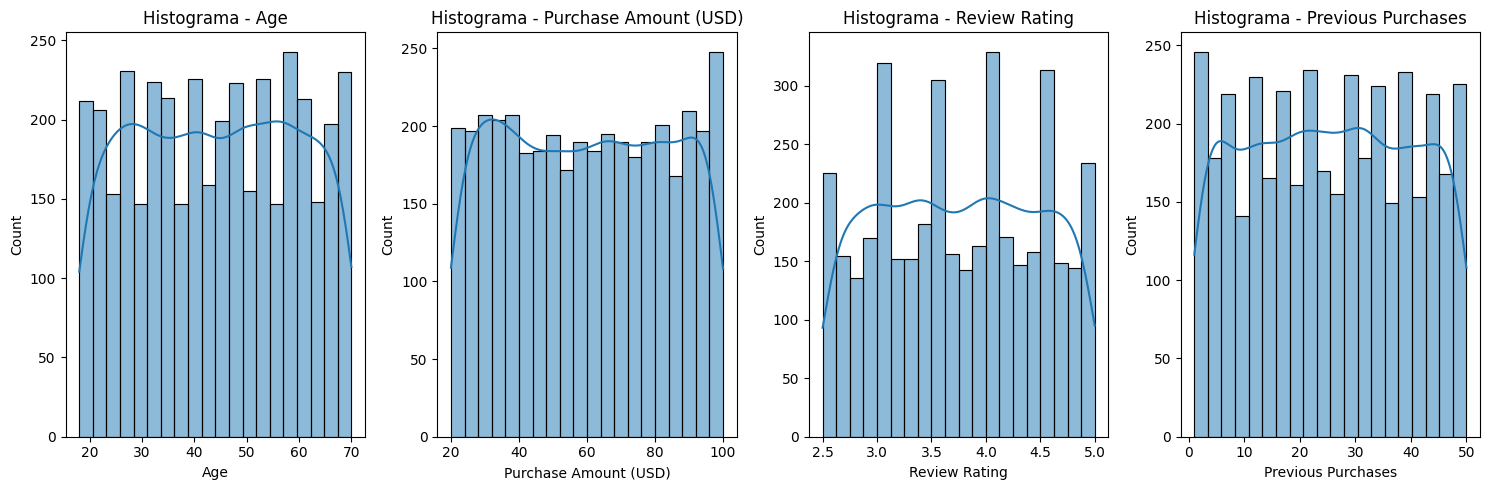

In [164]:
linhas = 1      
colunas = 4
fig, axes = plt.subplots(linhas, colunas, figsize=(15, 5 * linhas))

axes = axes.flatten()

for i, coluna in enumerate(colunas_num):
    sns.histplot(data=df_consumo, x=df_consumo[coluna], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Histograma - {coluna}')


for i in range(len(colunas_num), linhas * colunas):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [196]:
for coluna in colunas_num:
    mediana = df_consumo[coluna].median()
    media = df_consumo[coluna].mean()
    print(f"Mediana de {coluna} = {mediana}")
    print(f"Media de {coluna} = {media.round(2)}")


Mediana de Age = 44.0
Media de Age = 44.07
Mediana de Purchase Amount (USD) = 60.0
Media de Purchase Amount (USD) = 59.76
Mediana de Review Rating = 3.7
Media de Review Rating = 3.75
Mediana de Previous Purchases = 25.0
Media de Previous Purchases = 25.35


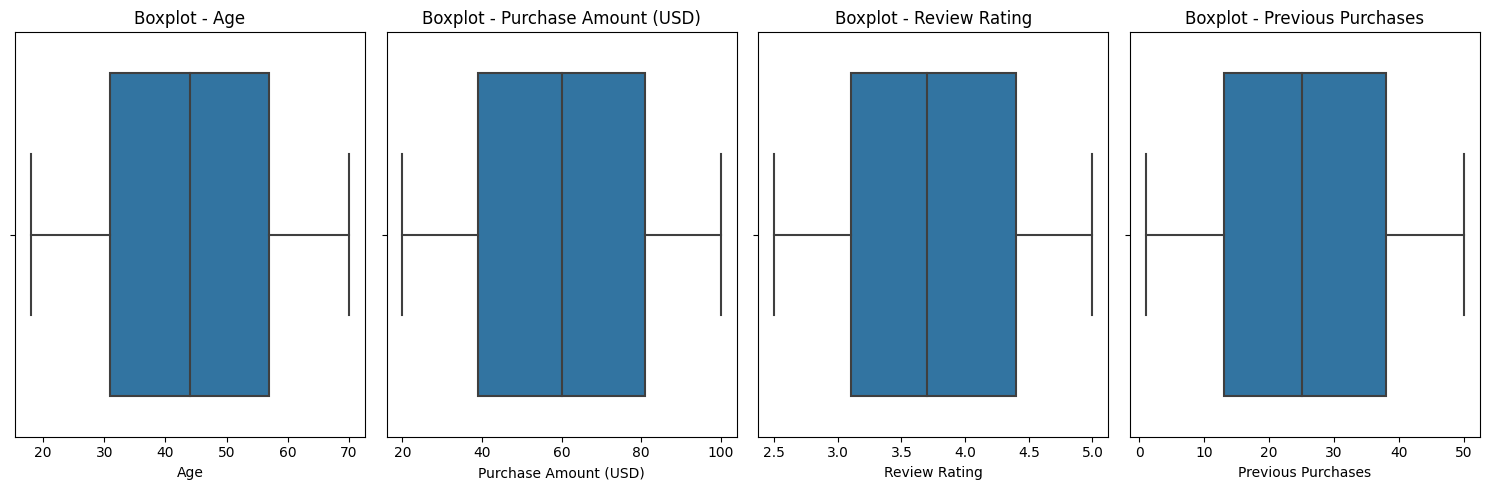

In [197]:
linhas = 1
colunas = 4

fig, axes = plt.subplots(linhas, colunas, figsize=(15, 5 * linhas))

axes = axes.flatten()

# Iterar sobre as colunas numéricas e criar Boxplot
for i, coluna in enumerate(colunas_num):
    sns.boxplot(data=df_consumo, x=df_consumo[coluna], ax=axes[i])
    axes[i].set_title(f'Boxplot - {coluna}')


for i in range(len(colunas_num), linhas * colunas):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

*Notamos uma distribuição simétrica das variáveis numéricas onde a media e mediana estão bem próximas e sem outliers*

## Pre-processamento 

In [280]:
colunas_numericas = df_consumo.select_dtypes(include='number').columns
colunas_categoricas = df_consumo.select_dtypes(include='O').columns

In [281]:
df_consumo.head()

,Age,Gender,Category,Purchase Amount (USD),Size,Review Rating,Subscription Status,Shipping Type,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases,Division
0,55,Male,Clothing,53,L,3.1,Yes,Express,Yes,14,Venmo,Fortnightly,East South Central
1,56,Male,Clothing,56,L,5.0,Yes,Next Day Air,Yes,7,Bank Transfer,Every 3 Months,East South Central
2,39,Male,Accessories,53,S,4.6,Yes,Free Shipping,Yes,45,PayPal,Weekly,East South Central
3,50,Male,Clothing,45,L,4.8,Yes,2-Day Shipping,Yes,27,Cash,Bi-Weekly,East South Central
4,44,Male,Accessories,39,L,3.7,Yes,Next Day Air,Yes,13,PayPal,Fortnightly,East South Central


In [282]:
df_original = df_consumo.copy()

In [283]:
le = LabelEncoder()
for coluna in colunas_categoricas:
     df_consumo[coluna] = le.fit_transform(df_consumo[coluna])
       

    
# Padronizar os dados (importante para o K-means)
scaler = StandardScaler()
df_consumo[colunas_numericas] = scaler.fit_transform(df_consumo[colunas_numericas])   

X = df_consumo.values

In [284]:
X

array([[ 0.71891344,  1.        ,  1.        , ...,  5.        ,
         3.        ,  1.        ],
       [ 0.78467851,  1.        ,  1.        , ...,  0.        ,
         2.        ,  1.        ],
       [-0.33332775,  1.        ,  0.        , ...,  4.        ,
         6.        ,  1.        ],
       ...,
       [ 0.39008807,  0.        ,  1.        , ...,  0.        ,
         2.        ,  0.        ],
       [ 0.0612627 ,  0.        ,  1.        , ...,  0.        ,
         2.        ,  0.        ],
       [-0.59638805,  0.        ,  0.        , ...,  4.        ,
         3.        ,  0.        ]])

In [285]:
df_consumo.head()

,Age,Gender,Category,Purchase Amount (USD),Size,Review Rating,Subscription Status,Shipping Type,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases,Division
0,0.718913,1,1,-0.285629,0,-0.907584,1,1,1,-0.785831,5,3,1
1,0.784679,1,1,-0.158952,0,1.745562,1,3,1,-1.270418,0,2,1
2,-0.333328,1,0,-0.285629,2,1.187005,1,2,1,1.360200,4,6,1
3,0.390088,1,1,-0.623433,0,1.466284,1,0,1,0.114118,1,1,1
4,-0.004502,1,0,-0.876786,0,-0.069748,1,3,1,-0.855057,4,3,1


## K-Means

##### Método Cotovelo (Elbow) para descobrir melhor valor de K

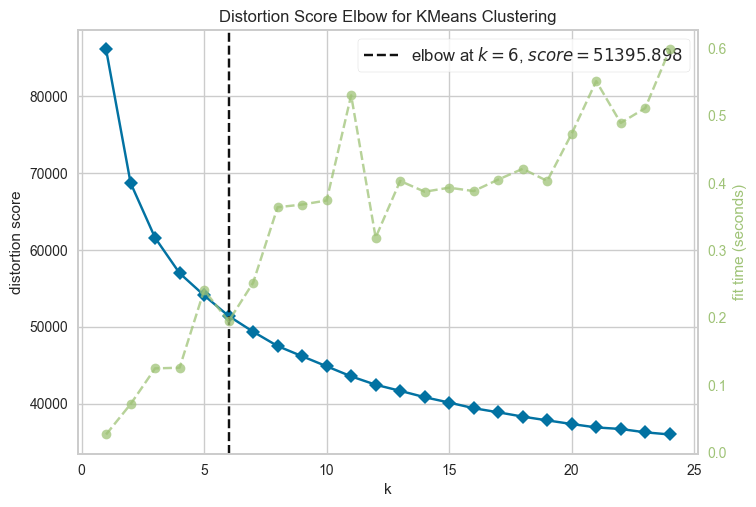

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [286]:
# Carrega o modelo Kmeans e a função KElbowVisualizer do Yellowbrick
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
 
# Instancia o modelo
model = KMeans(n_init=10)
 
# Instancia o visualizador
visualizer = KElbowVisualizer(model,       # o modelo K-means a ser utilizado
                              k = (1, 25)) # Faixa de valores para o K
 
# Fit do Visualizador
visualizer.fit(X)
 
# Mostra o gráfico
visualizer.show()

In [287]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Função para aplicar o K-Means e calcular métricas
def apply_kmeans_and_metrics(X, n_clusters, tol, max_iter):
    kmeans = KMeans(n_clusters=n_clusters, tol=tol, max_iter=max_iter, n_init=10, random_state=42)
    y_pred = kmeans.fit_predict(X)

    # Calcular métricas
    silhouette = silhouette_score(X, y_pred)
    dunn_index = davies_bouldin_score(X, y_pred)
    calinski_harabasz_index = calinski_harabasz_score(X, y_pred)

    return silhouette, dunn_index, calinski_harabasz_index, y_pred



In [289]:
# Testes com diferentes valores de clusters, tolerância e max_iter
n_clusters = 6
tol =  1e-3
max_iter = 100

#for n_clusters in n_clusters_values:
    #for tol in tolerance_values:
        #for max_iter in max_iter_values:
           # print(f'\n--- Resultados para Clusters={n_clusters}, Tolerância={tol}, Max Iter={max_iter} ---')
silhouette, dunn_index, calinski_harabasz_index, y_pred = apply_kmeans_and_metrics(X, n_clusters, tol, max_iter)
print(f'Silhouette Coefficient: {silhouette:.4f}')
print(f'Dunn Index: {dunn_index:.4f}')
print(f'Calinski-Harabasz Index: {calinski_harabasz_index:.4f}')

Silhouette Coefficient: 0.1178
Dunn Index: 2.1038
Calinski-Harabasz Index: 525.3043


In [263]:
df_original['cluster'] = y_pred

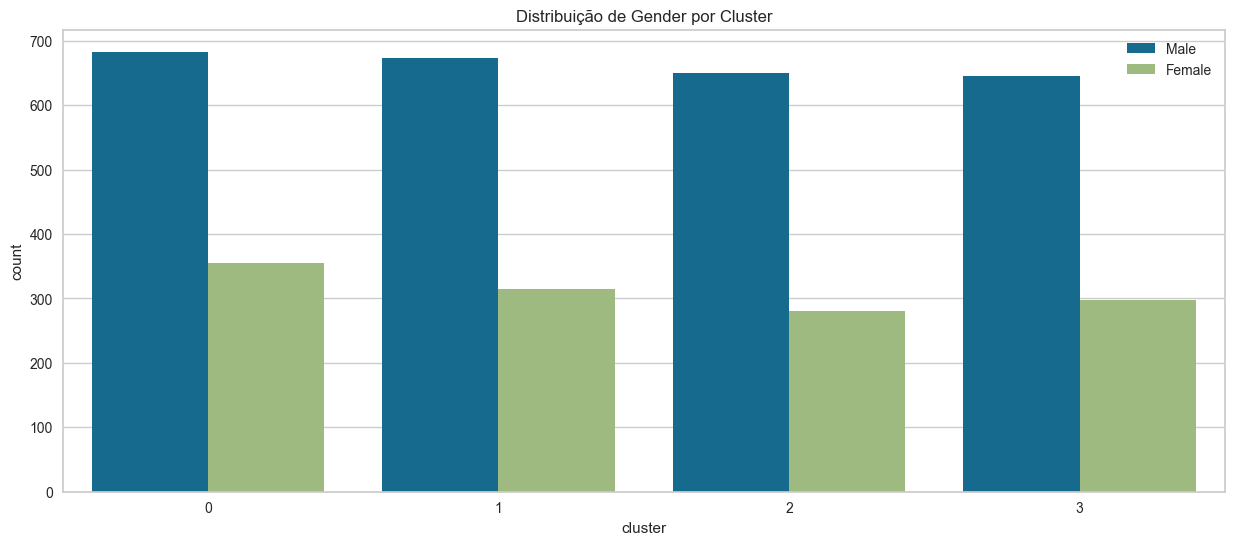

ValueError: Could not interpret input 'Item Purchased'

<Figure size 1500x600 with 0 Axes>

In [264]:
# Lista de colunas categóricas
categorical_columns = ['Gender', 'Item Purchased', 'Category','Division','Size','Season', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Payment Method', 'Frequency of Purchases']

# Lista de colunas numéricas
numeric_columns = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

# Criar gráficos de barras para colunas categóricas
for col in categorical_columns:
    plt.figure(figsize=(15, 6))
    sns.countplot(x='cluster', hue=col, data=df_original)
    plt.title(f'Distribuição de {col} por Cluster')
    plt.legend().set_visible(True)
    plt.show()

# Criar gráficos de barras para valores numéricos (média por cluster)
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.barplot(x='cluster', y=col, data=df_original)
    plt.title(f'Média de {col} por Cluster')
    plt.show()

In [188]:
df_c0 = df_original[df_original['cluster'] == 0]
df_c1 = df_original[df_original['cluster'] == 1]
df_c2 = df_original[df_original['cluster'] == 2]


In [190]:
df_c0.describe()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,cluster
count,1266.000000,1266.000000,1266.000000,1266.000000,1266.0
mean,44.291469,59.049763,3.723934,25.088468,0.0
std,15.039380,23.641457,0.728464,14.455386,0.0
min,18.000000,20.000000,2.500000,1.000000,0.0
25%,32.000000,38.000000,3.100000,13.000000,0.0
50%,43.000000,59.000000,3.700000,25.000000,0.0
75%,57.000000,80.000000,4.400000,37.750000,0.0
max,70.000000,100.000000,5.000000,50.000000,0.0


In [191]:
df_c1.describe()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,cluster
count,1241.000000,1241.000000,1241.000000,1241.000000,1241.0
mean,44.037873,59.887994,3.755439,25.298147,1.0
std,15.350508,23.768023,0.709171,14.503050,0.0
min,18.000000,20.000000,2.500000,1.000000,1.0
25%,30.000000,38.000000,3.100000,13.000000,1.0
50%,45.000000,60.000000,3.800000,26.000000,1.0
75%,57.000000,81.000000,4.400000,38.000000,1.0
max,70.000000,100.000000,5.000000,50.000000,1.0


In [192]:
df_c2.describe()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,cluster
count,1393.000000,1393.000000,1393.000000,1393.000000,1393.0
mean,43.893037,60.303661,3.768701,25.638191,2.0
std,15.240059,23.652303,0.711056,14.394874,0.0
min,18.000000,20.000000,2.500000,1.000000,2.0
25%,31.000000,40.000000,3.200000,13.000000,2.0
50%,43.000000,60.000000,3.800000,26.000000,2.0
75%,57.000000,81.000000,4.400000,38.000000,2.0
max,70.000000,100.000000,5.000000,50.000000,2.0
